In [1]:
from datetime import datetime, timedelta
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

sys.path.append('..')
from util.batcher import Batcher
#from util.stock_loader import Loader

In [2]:
TODAY = datetime.now().date()
TOMORROW  = TODAY + timedelta(1)
TOMORROW

datetime.date(2022, 9, 17)

In [3]:
DATA = '../data'

sp1950 = pd.read_csv(f'{DATA}/sp1950.csv')
nya1965 = pd.read_csv(f'{DATA}/nya1965.csv')
nasdaq1965 = pd.read_csv(f'{DATA}/nasdaq1965.csv')
wilshire1990 = pd.read_csv(f'{DATA}/wilshire1990.csv')


nasdaq1965.tail()
states = pd.read_csv(f'{DATA}/hmm_exp_returns.csv')
states.index = pd.to_datetime(states.Date)
states.tail()

,Date,sp,sp_daily,sp_exp,nyse,nyse_daily,nyse_exp,nas,nas_daily,nas_exp,wil,wil_daily,wil_exp,mean_exp,state
Date,,,,,,,,,,,,,,,
2022-09-12,2022-09-12,4110.410156,1.010584,1.000002,15352.179688,1.010624,0.999857,12266.410156,1.012723,1.000474,41146.421875,1.010690,1.000334,1.000167,0
2022-09-13,2022-09-13,3932.689941,0.956763,1.000002,14820.790039,0.965387,0.999857,11633.570312,0.948409,1.000474,39392.160156,0.957365,1.000334,1.000167,0
2022-09-14,2022-09-14,3946.010010,1.003387,1.000002,14843.209961,1.001513,0.999857,11719.679688,1.007402,1.000474,39545.250000,1.003886,1.000334,1.000167,0
2022-09-15,2022-09-15,3901.350098,0.988682,1.000002,14722.030273,0.991836,0.999857,11552.360352,0.985723,1.000474,39122.859375,0.989319,1.000334,1.000167,0
2022-09-16,2022-09-16,3873.330078,0.992818,1.000002,14573.911133,0.989939,0.999857,11448.403320,0.991001,1.000474,38750.464844,0.990481,1.000334,1.000167,0


In [4]:
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMZN', 'ANET',
    'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD', 'DDOG', 'DOCS',
    'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED', 'GOOG',
    'IDXX', 'INTG', 'ISRG', 'JD', 'LSPD', 'LULU', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NVCR', 'NVDA', 'OKTA', 'OPEN', 'PAC', 'PANW',
    'PAYC', 'PINS', 'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN',
    'ROKU', 'RVLV', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM',
    'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD',
    'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AMEH', 'APT', 'BYRN', 'CIZN', 'CUBE', 'EP', 'FCUV', 'GCBC', 'GME',
    'INTZ', 'KREF', 'MCVT', 'MICS', 'PETV', 'POWW', 'PRPH', 'RA', 'RVP',
    'WAVD', 'WKHS', 'VIRT', 'ZYXI']
BEST_WEIGHTED = [
    'ABM', 'AMRK', 'CELH', 'CTBB', 'CTDD', 'EVA', 'EXR', 'FCPT', 'FND',
    'GBOX', 'INSW', 'KNSL', 'LFMD', 'MNMD', 'MYOV', 'NSA', 'OMQS',
    'RRR', 'SBOW', 'STOR']
len(SYMBOLS)

69

In [5]:
TODAY = (datetime.now() + timedelta(1)).date()
YEARS_OF_DATA = 10
START = TODAY - timedelta(YEARS_OF_DATA * 365)
START, TODAY

(datetime.date(2012, 9, 19), datetime.date(2022, 9, 17))

In [6]:
batch = sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED)))

In [7]:
data = (
    yf
    .download(batch, start=START, end=TODAY)
    .rename(columns={'Adj Close': 'AdjClose'})
    .sort_index())

[*********************100%***********************]  111 of 111 completed


In [8]:
data['state'] = states.state
data.tail()

AdjClose                                                         \
                  AAPL        ABM        ABMD        ABNB        ADBE   ADYEY   
Date                                                                            
2022-09-12  163.429993  43.869999  279.160004  124.790001  396.359985  15.385   
2022-09-13  153.839996        NaN  266.390015  121.540001  368.390015  13.800   
2022-09-14  155.309998  41.959999  264.329987  126.800003  371.519989  14.190   
2022-09-15  152.369995        NaN  263.720001  125.040001  309.130005  13.770   
2022-09-16  150.699997  40.130001  258.670013  118.750000  299.500000  13.190   

                                                         ...     Volume  \
                  AMD       AMEH       AMRK        AMZN  ...       VEEV   
Date                                                     ...              
2022-09-12  84.639999  43.139999  29.049999  136.449997  ...   808500.0   
2022-09-13  77.029999  42.130001  28.400000  126.820000  ...   899500.0   
2022-09-14  77.449997  42.959999  27.930000  128.550003  ...   772000.0   
2022-09-15  76.660004  41.049999  26.740000  126.279999  ...  1453000.0   
2022-09-16  76.510002  39.240002  25.400000  123.529999  ...  1604800.0   

                                                                         \
                 VIRT        VLD   WAVD     WKHS        XPEV        ZEN   
Date                                                                      
2022-09-12   762300.0  1082200.0  14900  2666500  21170100.0  2323800.0   
2022-09-13   740700.0  1349700.0  14700  2695200  20166700.0  2907400.0   
2022-09-14   993700.0  1615000.0  29200  2711200  16809300.0  1714100.0   
2022-09-15   963600.0  2106400.0   5400  3147600  15506300.0  2630700.0   
2022-09-16  1988200.0  1388000.0  44500  3837400  26454800.0  3540500.0   

                              state  
                   ZM    ZYXI        
Date                                 
2022-09-12  3928900.0  169600     0  
2022-09-13  4654500.0  132900     0  
2022-09-14  4196500.0  164700     0  
2022-09-15  4247500.0  199500     0  
2022-09-16  6148600.0  306000     0  

[5 rows x 667 columns]

In [9]:
STATES = sorted(states.state.unique())
STATES

[0, 1, 2, 3, 4, 5]

In [10]:
CURRENT_STATE = states.state[-1]
CURRENT_STATE

0

In [11]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (
        sub.AdjClose[stock][sub.AdjClose[stock].notna()].index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [12]:
def get_daily_returns(x):
    idx = x.index
    n = len(x)
    x = np.array(x)
    #return x[2:n] / x[1:(n - 1)] - 1 
    returns = x[1:n] / x[0:(n-1)] - 1
    returns = pd.Series(returns, index=idx[1:])
    return returns

In [13]:
def get_sharpe(returns, window=None):
    n = len(returns)
    if window is None:
        window = n
    if len(returns) > window:
        returns = returns[(n - window):n]
    returns = returns[~np.isnan(returns)]
    sharpe = (np.sqrt(252) * returns.mean()) / returns.std()
    return sharpe

In [14]:
def get_hedged_sharpe(daily_returns, data):
    state_sharpe = get_sharpe(
        daily_returns[data.state == CURRENT_STATE])
    lower_state_sharpe = get_sharpe(
        daily_returns[data.state == max(CURRENT_STATE - 1, 0)])
    upper_state_sharpe = get_sharpe(
        daily_returns[
            data.state == min(CURRENT_STATE + 1, max(STATES))])
    return min(state_sharpe, lower_state_sharpe, upper_state_sharpe)

In [15]:
def get_weighted_sharpe(daily_returns, data, weights=[0.2, 0.6, 0.2]):
    state_sharpe = get_sharpe(
        daily_returns[data.state == CURRENT_STATE])
    lower_state_sharpe = get_sharpe(
        daily_returns[data.state == max(CURRENT_STATE - 1, 0)])
    upper_state_sharpe = get_sharpe(
        daily_returns[
            data.state == min(CURRENT_STATE + 1, max(STATES))])
    return (
        weights[0]*lower_state_sharpe
        + weights[1]*state_sharpe
        + weights[2]*upper_state_sharpe)

In [16]:
def rescale(a):
    a = a - a.min()
    a = a / a.max()
    return a

In [17]:
def vals_to_quantiles(a):
    n = len(a)
    qs = np.linspace(0, 1, n)
    order = np.argsort(a)
    out = qs[order]
    return out

In [18]:
def get_rsi(stock_data, window=14):
    df = stock_data.copy()
    df['deltas'] = df.AdjClose.diff(1)
    df['gains'] = df.deltas.clip(lower=0)
    df['losses'] = df.deltas.clip(upper=0).abs()
    df['avg_gain'] = (df.gains
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    df['avg_loss'] = (df.losses
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    
    # avg gains
    pd.options.mode.chained_assignment = None
    for i, row in enumerate(df.avg_gain.iloc[window + 1:]):
        df.avg_gain.iloc[i + window + 1] = (
            (df.avg_gain.iloc[i + window] * (window - 1) 
             + df.gains.iloc[i + window + 1]) 
            / window)
    # avg losses
    for i, row in enumerate(df.avg_loss.iloc[window + 1:]):
        df.avg_loss.iloc[i + window + 1] = (
            (df.avg_loss.iloc[i + window] * (window - 1)
             + df.losses.iloc[i + window + 1])
            / window)
    df['rs'] = df.avg_gain / df.avg_loss
    df['rsi'] = 100 - (100 / (1. + df.rs))
    return df.rsi

In [19]:
def get_macd(stock_data, fast=60, slow=90, signal=80, plot=False):
    df = stock_data.copy()
    exp1 = df.AdjClose.ewm(span=fast, adjust=False).mean()
    exp2 = df.AdjClose.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    if plot:
        plt.plot(macd, label='MACD', color='red')
        plt.plot(exp3, label='Signal', color='green')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.legend();
        plt.figure()
        plt.plot(histo, color='blue')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.axhline(y=0, color='k')
        plt.figure()
        plt.plot(is_rising)
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
    return is_rising

In [20]:
LMB = 0.9
RSI_WINDOW = 14
MACD_PARAMS = (60, 90, 80, False)

In [21]:
EXAMPLE = 'AAPL'

In [22]:
stock_data = get_stock_data(EXAMPLE, data.copy())
daily_returns = get_daily_returns(stock_data.AdjClose)
daily_returns
(get_sharpe(daily_returns), 
 get_sharpe(daily_returns[data.state == CURRENT_STATE]))

(0.8208497225893113, -1.5428940105517297)

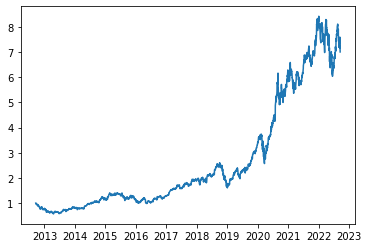

In [23]:
plt.plot(
    (get_daily_returns(data[('AdjClose', EXAMPLE)]) + 1).cumprod());

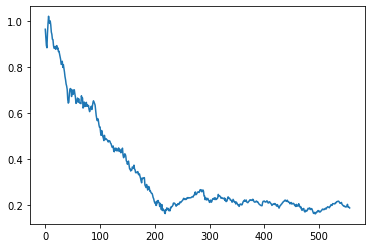

In [24]:
dr = get_daily_returns(
    data[('AdjClose', EXAMPLE)]
)[states.state == CURRENT_STATE]
dr = dr[dr.notnull()]
plt.plot((dr + 1).to_numpy().cumprod());

In [25]:
get_weighted_sharpe(daily_returns, data.copy())

-0.9141973667903198

In [26]:
def process_stock(stock, data, lmb=LMB, plot=False):
    stock_data = get_stock_data(stock, data)
    n = len(stock_data.AdjClose[~np.isnan(stock_data.AdjClose)])
    stock_data['direction'] = get_macd(stock_data, *MACD_PARAMS)
    stock_data['rsi'] = get_rsi(stock_data, window=RSI_WINDOW)
    stock_data.rsi = stock_data.rsi.rank(pct=True)
    daily_returns = get_daily_returns(stock_data.AdjClose)
    sharpe = get_sharpe(daily_returns)
    #state_sharpe = get_sharpe(
    #    daily_returns[data.state == CURRENT_STATE])
    #hedged_sharpe = get_hedged_sharpe(daily_returns, data)
    weighted_sharpe = get_weighted_sharpe(daily_returns, data)
    stock_data.fillna(method='ffill', inplace=True)
    stock_data.fillna(method='bfill', inplace=True)
    WINDOW = min(n // 2, 125)
    stock_data['ann_high'] = (
        stock_data.AdjClose.rolling(window=WINDOW).max())
    stock_data['ann_low'] = (
        stock_data.AdjClose.rolling(window=WINDOW).min())
    stock_data['drawdown'] = stock_data.AdjClose / stock_data.ann_high
    stock_data.drawdown = stock_data.drawdown.rank(pct=True)
    stock_data['pullup'] = stock_data.AdjClose / stock_data.ann_low
    stock_data.pullup = stock_data.pullup.rank(pct=True)
    w = [lmb ** t for t in range(n)][::-1]
    stock_data['W'] = w
    stock_data['n_samp'] = (stock_data.Volume / 100)  * stock_data.W
    stock_data['value'] = (
        (stock_data.AdjClose 
         + stock_data.High 
         + stock_data.Low 
         + stock_data.Open) 
        / 4)
    stock_data['est'] = np.nan
    for day in stock_data.index:
        sub = stock_data[stock_data.index <= day]
        weights = sub.n_samp
        weights = weights / weights.sum()
        values = sub.value
        est = np.dot(weights, values)
        stock_data.loc[day, 'est'] = est
    stock_data['resid'] = stock_data.AdjClose / stock_data.est
    stock_data.resid = stock_data.resid.rank(pct=True)
    stock_data.sort_values('resid', inplace=True)
    stock_data['dev'] = np.array(range(n)) / n
    stock_data.dev = stock_data.dev.rank(pct=True)
    stock_data.sort_index(inplace=True)
    if plot:
        plt.figure(figsize=(12, 8))
        plt.plot(stock_data.AdjClose, label='AdjClose')
        plt.plot(stock_data.est, label='Est')
        plt.yscale('log')
        plt.plot(stock_data.ann_high, color='green')
        plt.plot(stock_data.ann_low, color='red')
        plt.legend();
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.dev)
        plt.axhline(0.5, color='k')
        plt.title(stock)
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.drawdown, color='red', label='drawdown')
        plt.plot(stock_data.pullup, color='green', label='pullup')
        plt.plot(
            np.sqrt(stock_data.drawdown * stock_data.pullup),
            color='grey',
            label='geomean')
        plt.yscale('log')
        plt.legend()
    return (
        stock_data.direction.tolist()[-1],
        stock_data.rsi.tolist()[-1],
        stock_data.resid.tolist()[-1], 
        stock_data.dev.tolist()[-1],
        stock_data.drawdown.tolist()[-1],
        stock_data.pullup.tolist()[-1],
        sharpe,
        #state_sharpe,
        #hedged_sharpe,
        weighted_sharpe)

(0,
 0.11035585765693723,
 0.44612326043737577,
 0.44612326043737577,
 0.1606022584692597,
 0.2781263069845253,
 0.8208497225893113,
 -0.9141973667903198)

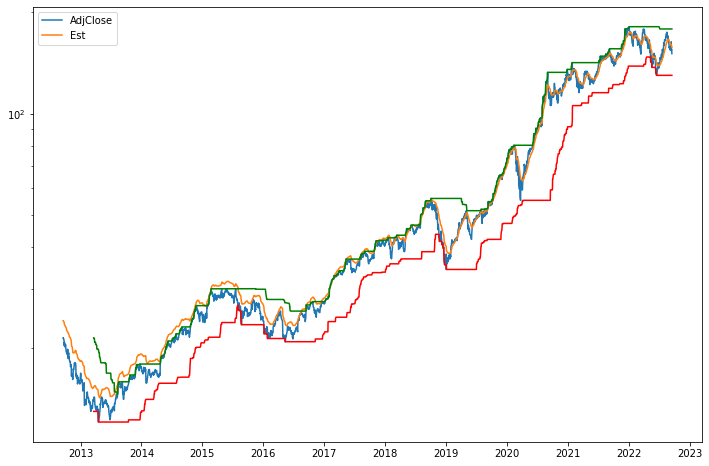

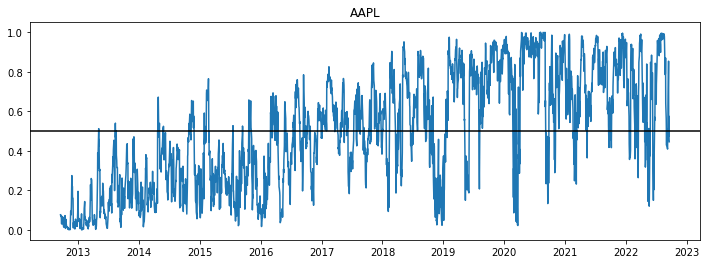

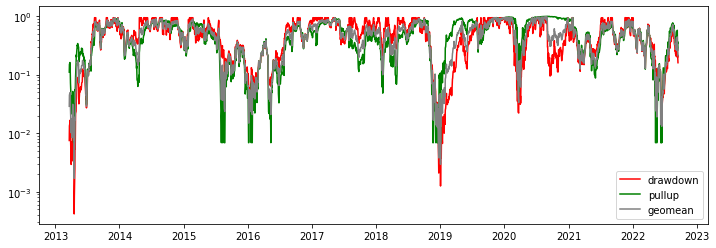

In [27]:
process_stock('AAPL', data.copy(), plot=True)

In [28]:
out = []
for stock in batch:
    print(f'{stock}...', end=' ')
    stock_stats = process_stock(stock, data)
    out.append([stock, *stock_stats])

AAPL... ABM... ABMD... ABNB... ADBE... ADYEY... AMD... AMEH... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BYND... BYRN... CELH... CHWY... CIZN... CRWD... CTBB... CTDD... CUBE... DDOG... DOCS... DOCU... DUOL... EDIT... EP... ETSY... EVA... EXR... FCPT... FCUV... FLGT... FND... GBOX... GCBC... GH... GME... GMED... GOOG... IDXX... INSW... INTG... INTZ... ISRG... JD... KNSL... KREF... LFMD... LSPD... LULU... MCVT... MDB... MELI... MICS... MNMD... MNST... MSFT... MTCH... MYOV... NSA... NVCR... NVDA... OKTA... OMQS... OPEN... PAC... PANW... PAYC... PETV... PINS... POWW... PRPH... PYPL... QDEL... RA... RBLX... RDFN... RGEN... RIVN... ROKU... RRR... RVLV... RVP... SBOW... SE... SHOP... SNOW... STOR... TASK... TDOC... TEAM... TREX... TTD... TTWO... TWLO... TWTR... TYL... UPST... VEEV... VIRT... VLD... WAVD... WKHS... XPEV... ZEN... ZM... ZYXI... 

In [29]:
out_df = pd.DataFrame(
    data=out, 
    columns=[
        'stock', 'direction', 'RSI', 'fair_value_mult', 'dev_quantile',
        'drop','climb', 'sharpe', 'weighted_sharpe'])
out_df['geomean'] = np.sqrt(out_df['drop'] * out_df.climb)
out_df['score'] = (
    out_df.fair_value_mult
    * out_df.dev_quantile
    * out_df['drop']
    * out_df.climb) ** (1/4) 
out_df['RSIRev'] = 1 - out_df.RSI
out_df = out_df[
    ['stock', 'direction', 'RSI', 'RSIRev', 'fair_value_mult', 
     'dev_quantile', 'drop', 'climb', 'geomean', 'score',  'sharpe',
     'weighted_sharpe']]
out_df.RSI.fillna(out_df.RSI.median())
out_df.RSIRev.fillna(out_df.RSIRev.median())

out_df.sort_values('stock')
out_df.head()

,stock,direction,RSI,RSIRev,fair_value_mult,dev_quantile,drop,climb,geomean,score,sharpe,weighted_sharpe
0,AAPL,0,0.110356,0.889644,0.446123,0.446123,0.160602,0.278126,0.211347,0.307062,0.820850,-0.914197
1,ABM,0,0.039200,0.960800,0.031424,0.031424,0.071130,0.233054,0.128752,0.063607,0.424308,-0.127977
2,ABMD,0,0.173930,0.826070,0.174155,0.174155,0.186115,0.247177,0.214484,0.193270,0.790003,-0.857291
3,ABNB,1,0.596288,0.403712,0.456180,0.456180,0.323988,0.884735,0.535391,0.494201,0.092186,-0.826789
4,ADBE,0,0.000800,0.999200,0.001988,0.001988,0.023003,0.007528,0.013159,0.005115,0.866815,-1.263878


In [30]:
out_df.geomean.quantile([0.05, 0.99])

0.05    0.014883
0.99    0.947655
Name: geomean, dtype: float64

In [31]:
out_df.to_csv('individ_quantiles.csv', index=False)

In [32]:
!open individ_quantiles.csv